# VC_P4 - Detección de caras con webcam

**Realizado por:**
- Giovanni Sgambato
- Agata Cavigioli


**Setup**  
Hemos utilzado: conda install -c conda-forge dlib --> https://github.com/davisking/dlib/issues/2671

**PNG editor**  
https://onlinepngtools.com/create-transparent-png  
imgs  
https://pngtree.com/freepng/retro-filter-glasses_6105148.html

**Errore webcam**:  
El utilizo de opencv nos diò muy a menudo este error con la webcam:  
0xa00f4240<unknown> (0x80004003)  
https://www.thewindowsclub.com/fix-camera-app-error-0xa00f4240-in-windows  
https://answers.microsoft.com/en-us/windows/forum/all/a-problem-has-occurred-0xa00f4240-unknown/79d627c0-6202-46bb-a6a7-14bc72e6049d


## 1) Easy Face Detector

Using directly **dlib** --> dlib.get_frontal_face_detector()

In [1]:
import cv2
import time
import FaceNormalizationUtils as faceutils

# https://www.kaggle.com/code/carlossouza/face-detection-in-a-couple-of-lines-with-dlib
import numpy as np
from matplotlib import pyplot as plt
import dlib

In [2]:
# check webcam

def find_available_webcams():
    available_webcams = []
    index = 0

    while True:
        cap = cv2.VideoCapture(index)

        if not cap.isOpened():
            break

        ret, _ = cap.read()
        cap.release()

        if ret:
            available_webcams.append(index)

        index += 1

    return available_webcams

webcam_list = find_available_webcams()

if len(webcam_list) > 0:
    print("Webcam disponibili:")
    for index, webcam_index in enumerate(webcam_list):
        print(f"Webcam {index + 1}: /dev/video{webcam_index}")
else:
    print("Nessuna webcam disponibile.")


Webcam disponibili:
Webcam 1: /dev/video0
Webcam 2: /dev/video1


In [3]:
# Webcam connection
cap = cv2.VideoCapture(0)
# Check for other cameras
if not cap.isOpened():
    cap = cv2.VideoCapture(1)
    if not cap.isOpened():
        cap = cv2.VideoCapture(0)
        if not cap.isOpened():
            print('Camera error')
            exit(0)
        else:
            print('Camera 0')
    else:
        print('Camera 1')
else:
    print('Camera 0')

#Set camera resolution
cap.set(3,640);
cap.set(4,480);

try:
    while True:
        # Get frame
        _, image = cap.read()

        # --- --- --- face detector

        face_detector = dlib.get_frontal_face_detector()
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        faces = face_detector(gray, 1)
        if len(faces) > 0:
            face = faces[0]

        face_image = image[face.top():face.bottom(), face.left():face.right()]

        # --- --- ---

        cv2.imshow('Cam', image)
        cv2.imshow('Detected', face_image)

        # Esc to finish
        tec = cv2.waitKey(40)
        if tec & tec == 27:  # Esc
            break

except Exception as e:
    print(f" errore: {e}")            

finally:    
    # Close windoews and release camera
    cap.release()
    print('ciao')
    cv2.destroyAllWindows()

Camera 0
ciao


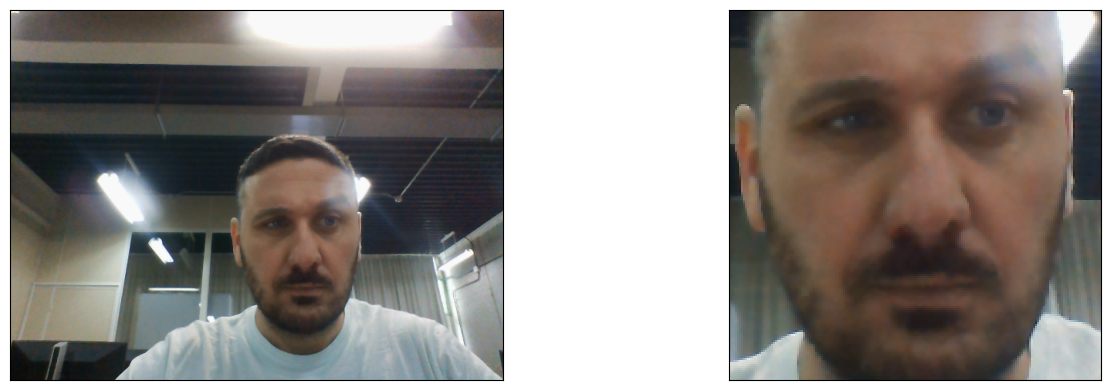

In [4]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
face_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2RGB)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
ax1.imshow(image)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)

ax2.imshow(face_image)
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)

plt.grid(False)
plt.tight_layout()

In [5]:
# Close windoews and release camera
cap.release()
print('ciao')
cv2.destroyAllWindows()

ciao


## 2) Easy Filtro

In [6]:
# face detector
import FaceDetectors
import FaceNormalizationUtils as faceutils

#other
import cv2
import numpy as np
from matplotlib import pyplot as plt


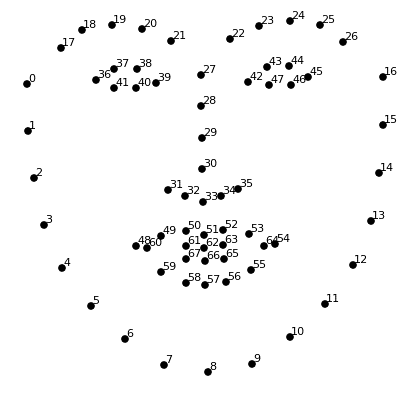

In [7]:
# --- --- --- filtro

# --- Imagenes de filtros con alpha
bowtie = cv2.imread('Images/bowtie.png', cv2.IMREAD_UNCHANGED)
gafas = cv2.imread('Images/gafas3.png', cv2.IMREAD_UNCHANGED)
sombrero = cv2.imread('Images/sombrero.png', cv2.IMREAD_UNCHANGED)

# --- Redimensionar imágenes 
gafas = cv2.resize(gafas, (gafas.shape[1] // 7, gafas.shape[0] // 7))
sombrero = cv2.resize(sombrero, (sombrero.shape[1] // 2, sombrero.shape[0] // 2))
bowtie = cv2.resize(bowtie, (bowtie.shape[1] // 5, bowtie.shape[0] // 5))


# --- funcion filtro
def img_filtro(frame, filtro, shape_index, x_offset, y_offset):
    x_filtro = shape[shape_index][0] - int(filtro.shape[1] / 2)
    y_filtro = shape[shape_index][1] - int(filtro.shape[0] / 2) + y_offset

    if x_filtro >= 0 and y_filtro >= 0 and \
        (x_filtro + filtro.shape[1] <= frame.shape[1]) and \
            (y_filtro + filtro.shape[0] <= frame.shape[0]):
        
        filtro_resized = cv2.resize(filtro, (int(filtro.shape[1]), int(filtro.shape[0])))
        
        #trasparenza
        
        alpha = filtro_resized[:, :, 3] / 255.0

        for c in range(0, 3):
            frame[y_filtro:y_filtro + filtro_resized.shape[0], x_filtro:x_filtro + filtro_resized.shape[1], c] = \
            (
                frame[y_filtro:y_filtro + filtro_resized.shape[0], x_filtro:x_filtro + filtro_resized.shape[1], c] * 
                (1 - alpha) + filtro_resized[:, :, c] * alpha
            )


In [11]:
# Inicializar el detector facial
#FDet = FaceDetectors_new.FaceDetector()
FDet = FaceDetectors.FaceDetector()

# Conectar a la cámara web
cap = cv2.VideoCapture(0)

# Verificar si hay otras cámaras disponibles
if not cap.isOpened():
    cap = cv2.VideoCapture(1)
    if not cap.isOpened():
        cap = cv2.VideoCapture(0)
        if not cap.isOpened():
            print('Error de cam')
            exit(0)
        else:
            print('Cam 0')
    else:
        print('Cam 1')
else:
    print('Cam 0')

# Establecer la resolución de la cámara
cap.set(3, 640)
cap.set(4, 480)

alto, ancho, _ = [480,640,None]
fourcc = cv2.VideoWriter_fourcc(*'XVID')
video_salida = cv2.VideoWriter('filtro.avi', fourcc, 4, (ancho, alto))
count = 0

try:
    while True:
        # frame de webcam
        ret, frame = cap.read()
        alto, ancho, _ = frame.shape
        
        t = time.time()
        #print(t)
        
        #frame-rate
        fps = cap.get(cv2.CAP_PROP_FPS)  # Ottiene il frame rate del video
        #print(f"Frame rate del video: {fps} FPS")
        
        # Deteccion de cara y ojos en el frame
        values = FDet.DetectLargestFaceEyesDNN(frame,'DLIB68') #
        if values is not None:
            face, eyes, shape = values

        #dibujar imagenes de filtro
            [x, y, w, h] = face
            if x > -1:
                #cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
                [lex, ley, rex, rey] = eyes
                if lex > -1:                
                    img_filtro(frame, bowtie, 8, 0, 20)
                    img_filtro(frame, sombrero, 27, 0, -70)
                    img_filtro(frame, gafas, 27, 0, 10)

        cv2.imshow('Cam', frame)
       
        # --- video output
        
        if count < 40:
            video_salida.write(frame)        
        else:
            #cv2.waitKey(20)
            #cap.release()
            #cv2.destroyAllWindows()
            break
        
        count += 1

        # Esc para finalizar
        tec = cv2.waitKey(40)
        if tec == 27:  # Esc
            break

except Exception as e:
    print(f" errore: {e}")            

finally:                          
    # Cerrar la ventana y liberar la cámara
    cap.release()
    cv2.destroyAllWindows()
    print('ciao')

Cam 0
ciao


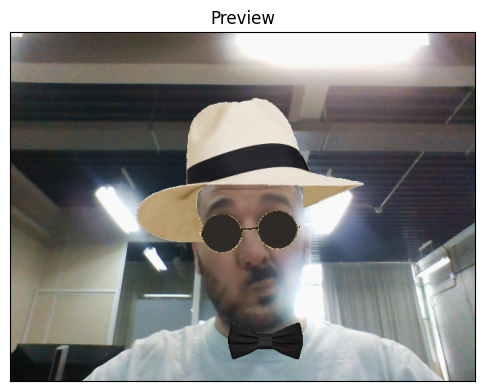

In [12]:
# --- preview
framee = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Imposta le dimensioni del plot
fig, ax = plt.subplots(figsize=(6, 6))

# Mostra l'immagine
ax.imshow(framee)

# Imposta i parametri del plot
ax.set_title('Preview')
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.grid(False)
#plt.tight_layout()

# Mostra il plot
plt.show()


**voto:**  
grupo 4 - daniel  
grupo 20 - alejandro ortega , joaquin villamonte  
grupo 8 -   